In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_excel('data/Merged Data/merged_medical_with_location.xlsx')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [51]:
accident_keywords = [
    'fracture', 'injury', 'trauma', 'burn', 'laceration', 'wound',
    'contusion', 'abrasion', 'bruise', 'impact', 'rupture',
    'dislocation', 'sprain', 'strain', 'tear', 'fall', 'collision',
    'traffic accident', 'motor vehicle accident', 'occupational injury',
    'work accident', 'open wound of head', 'closed fracture', 'clavicle fracture',
    'finger fracture', 'ankle fracture', 'knee injury', 'head injury',
    'cranial trauma', 'muscle strain', 'myalgia', 'bursitis',
    'sprain and strain', 'dislocation of patella', 'fracture of clavicle',
    'fracture of other finger', 'injuries to the knee', 'injuries to the lower leg',
    'spontaneous rupture', 'pain in joint', 'arthralgia',
    'dislocation, sprain and strain of joint', 'ankle and foot',
    'rotator cuff syndrome', 'achilles tendinitis', 'calcific tendinitis',
    'epistaxis', 'haemorrhage', 'foreign body', 'unspecified injury of head',
    'tendon', 'ligament', 'cruciate', 'collateral ligament', 'ankle', 'knee',
    'shoulder', 'patella', 'finger', 'toe', 'joint', 'muscle',
    'back pain', 'low back pain', 'lumbar', 'sciatica',
    'lumbago', 'strain of ankle', 'sprain of ankle', 'headache after trauma'
]

In [52]:
diagnosis_lower = df['DIAGNOSIS DESC'].astype(str).str.lower()
df['ACCIDENT_FLAG'] = diagnosis_lower.apply(lambda x: int(any(k in x for k in accident_keywords)))

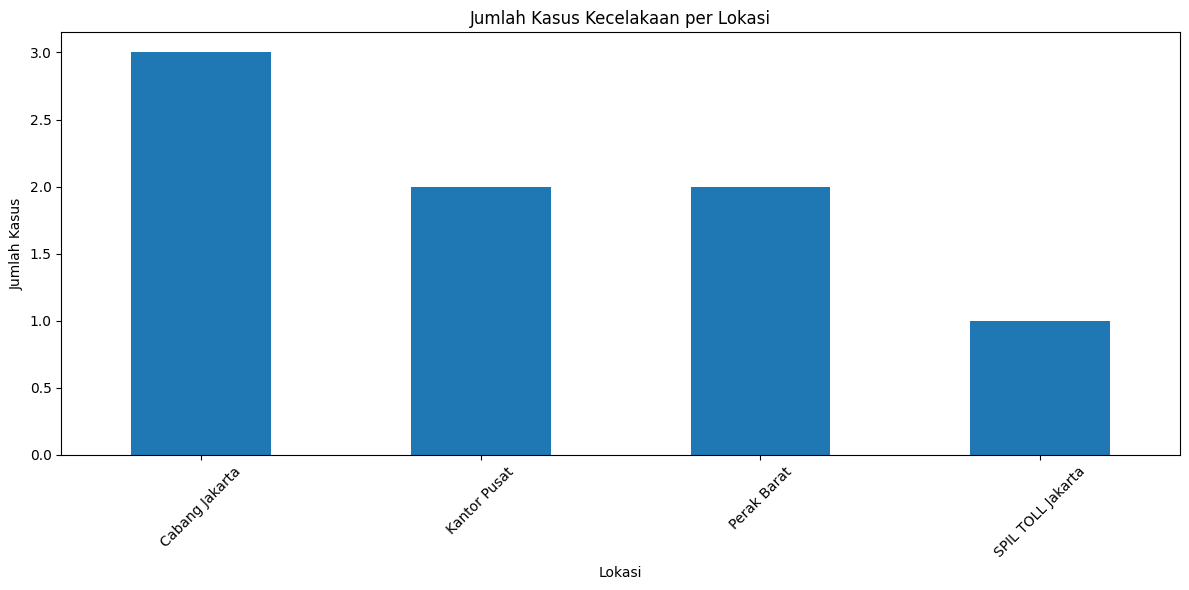

In [53]:
accident_per_location = df[df['ACCIDENT_FLAG'] == 1]['Location'].value_counts()
accident_per_location.plot(kind='bar', figsize=(12, 6), title='Jumlah Kasus Kecelakaan per Lokasi')
plt.xlabel('Lokasi'); plt.ylabel('Jumlah Kasus'); plt.xticks(rotation=45); plt.tight_layout()
plt.show()

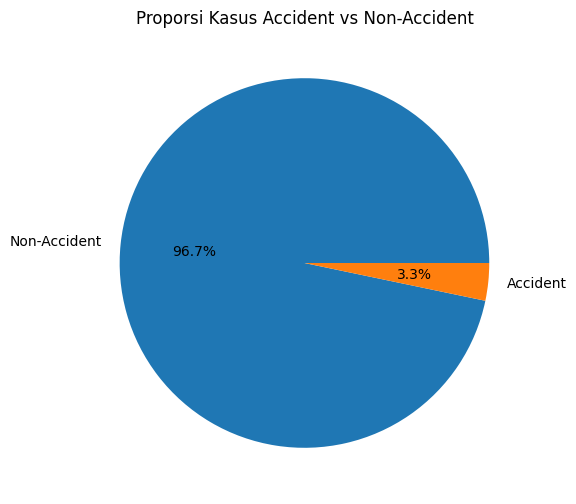

In [54]:
df['ACCIDENT_FLAG'].value_counts().plot(
    kind='pie',
    labels=['Non-Accident', 'Accident'],
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Proporsi Kasus Accident vs Non-Accident',
    ylabel=''
)
plt.show()

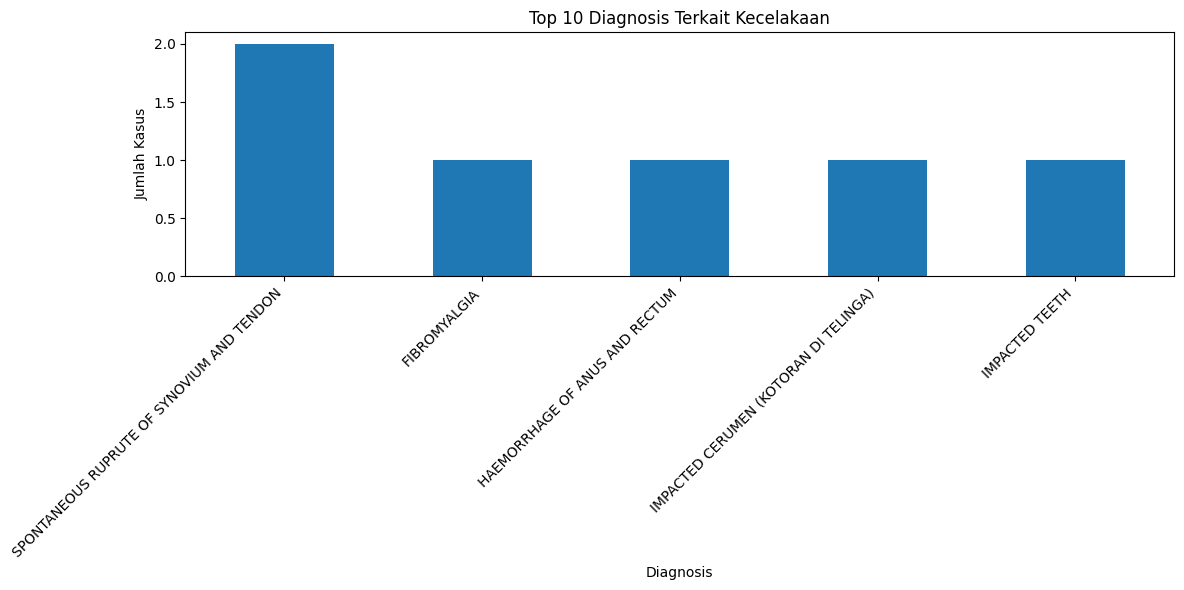

In [56]:
df[df['ACCIDENT_FLAG'] == 1]['DIAGNOSIS DESC'].value_counts().head(5).plot(
    kind='bar',
    figsize=(12, 6),
    title='Top 10 Diagnosis Terkait Kecelakaan'
)
plt.xlabel('Diagnosis'); plt.ylabel('Jumlah Kasus'); plt.xticks(rotation=45, ha='right'); plt.tight_layout()
plt.show()

| No | Penyebab Risiko                                       | Solusi / Preventive Action                                                                             | Device / Sensor                             | Yang Dimonitoring (Parameter)                                                             |
| -- | ----------------------------------------------------- | ------------------------------------------------------------------------------------------------------ | ------------------------------------------- | ----------------------------------------------------------------------------------------- |
| 1  | Kurangnya pemanasan / penggunaan otot tanpa persiapan | - Edukasi & reminder pemanasan<br>- Wajib stretching 4×/hari<br>- Pemantauan aktivitas stretching      | Kamera (Pose Detection)                  | - Jumlah sesi stretching per orang<br>- Kepatuhan pemanasan                               |
| 2  | Aktivitas di area berisiko                            | - Batasi akses area rawan<br>- Pasang signage<br>- Monitor keberadaan pekerja di area risiko           | Kamera (Person Detection + Zone Control) | - Jumlah orang di area rawan<br>- Lama waktu berada di area berisiko                      |
| 3  | Kurangnya penggunaan alat pelindung (APD)             | - Edukasi pentingnya APD<br>- Upgrade APD sesuai risiko<br>- Peringatan otomatis jika tidak terdeteksi | Kamera (PPE Detection)                   | - Kepatuhan pemakaian APD<br>- Jenis APD yang dipakai / tidak dipakai                     |
| 4  | Masalah pada telinga / paparan suara tinggi           | - Gunakan headset / earplug<br>- Alarm desibel tinggi<br>- Jadwal rotasi kerja area bising             | Desibel Meter IoT                        | - Tingkat kebisingan real-time (dB)<br>- Durasi paparan suara                             |
| 5  | Luka akibat benda tajam / tumpul                      | - Gunakan APD khusus<br>- Area kerja steril dari bahaya<br>- Panic button untuk respon cepat           | Kamera + Panic Button                 | - Jumlah insiden (panic alert)<br>- Waktu respon<br>- Aktivitas yang terjadi saat insiden |
